### Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


dados_consolidados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)


print(f"Total de registros consolidados: {len(dados_consolidados)}")
print("\nPrimeiras linhas do dataset consolidado:")
display(dados_consolidados.head())








Total de registros consolidados: 9435

Primeiras linhas do dataset consolidado:


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [2]:
# Listar colunas de cada DataFrame
colunas_por_loja = {
    'Loja 1': loja1.columns.tolist(),
    'Loja 2': loja2.columns.tolist(),
    'Loja 3': loja3.columns.tolist(),
    'Loja 4': loja4.columns.tolist()
}

# Verificar diferenças
from collections import defaultdict
diferencas = defaultdict(list)

for loja, colunas in colunas_por_loja.items():
    for col in colunas:
        if not all(col in df.columns for df in [loja1, loja2, loja3, loja4]):
            diferencas[col].append(loja)

print("Colunas inconsistentes:")
for col, lojas in diferencas.items():
    print(f"- '{col}': Presente apenas em {', '.join(lojas)}")

Colunas inconsistentes:


In [3]:
nulos = dados_consolidados.isnull().sum()
percentual_nulos = (nulos / len(dados_consolidados)) * 100

resumo_nulos = pd.DataFrame({
    'Valores Nulos': nulos,
    'Percentual (%)': percentual_nulos.round(2)
})

print("Resumo de valores nulos:")
display(resumo_nulos[resumo_nulos['Valores Nulos'] > 0])

Resumo de valores nulos:


,Valores Nulos,Percentual (%)


In [4]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


lojas = {
    'loja1': loja1,
    'loja2': loja2,
    'loja3': loja3,
    'loja4': loja4
}

for df in lojas.values():
    df['Produto'] = df['Produto'].str.lower().str.strip()

# Passo 2: Criar um dicionário de IDs únicos para TODOS os produtos das 4 lojas
todos_produtos = pd.concat([df['Produto'] for df in lojas.values()]).unique()
id_produto = {produto: i + 1 for i, produto in enumerate(todos_produtos)}


for nome, df in lojas.items():

    posicao_produto = df.columns.get_loc('Produto')


    df.insert(
        loc=posicao_produto,
        column='id_produto',
        value=df['Produto'].map(id_produto)
    )


for nome, df in lojas.items():
    print(f"\nPrimeiras linhas da {nome}:")
    display(df[['id_produto', 'Produto']].head(3))


Primeiras linhas da loja1:


,id_produto,Produto
0,1,assistente virtual
1,2,mesa de jantar
2,3,jogo de tabuleiro



Primeiras linhas da loja2:


,id_produto,Produto
0,5,cadeira de escritório
1,51,pandeiro
2,49,cama king



Primeiras linhas da loja3:


,id_produto,Produto
0,33,secadora de roupas
1,29,cômoda
2,44,violão



Primeiras linhas da loja4:


,id_produto,Produto
0,8,lava louças
1,27,cama box
2,41,bola de basquete


In [5]:
for nome, df in lojas.items():
    df.to_csv(f'{nome}_com_id.csv', index=False)

In [6]:
import pandas as pd

# Função para formatar no padrão BR (R$ 6,73)
def formatar_br(valor):
    return f"{valor:,.2f}".replace(".", "X").replace(",", ".").replace("X", ",")


urls = {
    "loja1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "loja2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "loja3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "loja4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}


lojas_formatadas = {}
for nome, url in urls.items():
    df = pd.read_csv(url)

    # Passo 1: Arredondar para 2 casas decimais
    df['Frete'] = df['Frete'].round(2)

    # Passo 2: Converter para string no formato brasileiro
    df['Frete'] = df['Frete'].apply(formatar_br)

    lojas_formatadas[nome] = df
    print(f"✅ {nome}: Frete formatado (exemplo: {df['Frete'].iloc[0]})")


print("\nPrimeiras linhas da loja1:")
display(lojas_formatadas["loja1"][['Frete']].head())

✅ loja1: Frete formatado (exemplo: 9,25)
✅ loja2: Frete formatado (exemplo: 20,42)
✅ loja3: Frete formatado (exemplo: 88,82)
✅ loja4: Frete formatado (exemplo: 74,60)

Primeiras linhas da loja1:


,Frete
0,"9,25"
1,"11,23"
2,"21,26"
3,"54,67"
4,"26,96"


In [7]:
for nome, df in lojas.items():
    df.to_csv(f'{nome}_com_id.csv', index=False)

#1. Análise do faturamento


--- FATURAMENTO POR LOJA (Preço + Frete) ---
loja1: R$ 1.616.347,09
loja2: R$ 1.567.773,22
loja3: R$ 1.542.047,69
loja4: R$ 1.458.253,46


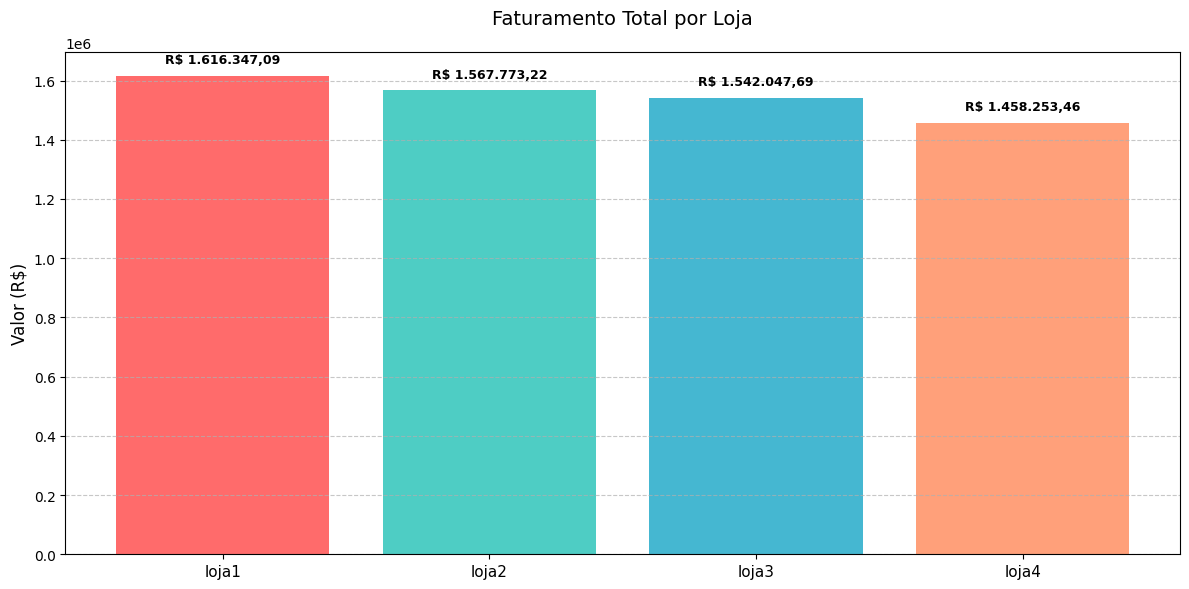

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


urls = {
    "loja1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "loja2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "loja3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "loja4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}


resultados = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    faturamento = (df['Preço'].sum() + df['Frete'].sum()).round(2)
    resultados[nome] = faturamento

# Formatar saída no padrão brasileiro
print("--- FATURAMENTO POR LOJA (Preço + Frete) ---")
for loja, valor in resultados.items():
    print(f"{loja}: R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

# Gráfico de barras com valores
plt.figure(figsize=(12, 6))
bars = plt.bar(resultados.keys(), resultados.values(), color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02 * max(resultados.values()),
        f'R$ {height:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title("Faturamento Total por Loja", fontsize=14, pad=20)
plt.ylabel("Valor (R$)", fontsize=12)
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [9]:
print(dados_consolidados.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')


# 2. Vendas por Categoria



🔍 Análise de Vendas por Categoria

📊 Vendas Totais por Categoria:


,Total Vendido
Categoria do Produto,
eletronicos,"R$ 2.332.048,08"
eletrodomesticos,"R$ 1.860.198,66"
moveis,"R$ 1.064.149,77"
instrumentos musicais,"R$ 489.701,48"
esporte e lazer,"R$ 200.891,94"
brinquedos,"R$ 103.502,36"
utilidades domesticas,"R$ 80.921,72"
livros,"R$ 53.007,43"



🏪 Vendas por Categoria e Loja:


<ipython-input-10-1e2221fe2c69>:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(vendas_categoria_loja.applymap(formatar_br))


Loja,loja1,loja2,loja3,loja4
Categoria do Produto,,,,
brinquedos,"R$ 25.299,27","R$ 22.445,83","R$ 27.258,60","R$ 28.498,67"
eletrodomesticos,"R$ 510.678,32","R$ 489.499,13","R$ 462.310,46","R$ 397.710,75"
eletronicos,"R$ 603.278,24","R$ 576.858,27","R$ 576.840,39","R$ 575.071,18"
esporte e lazer,"R$ 55.216,66","R$ 48.828,90","R$ 50.020,62","R$ 46.825,77"
instrumentos musicais,"R$ 128.243,50","R$ 147.397,09","R$ 108.652,54","R$ 105.408,35"
livros,"R$ 12.336,41","R$ 14.195,84","R$ 13.326,38","R$ 13.148,81"
moveis,"R$ 263.505,32","R$ 247.817,05","R$ 282.475,23","R$ 270.352,16"
utilidades domesticas,"R$ 17.789,38","R$ 20.731,11","R$ 21.163,47","R$ 21.237,76"



📈 Gráficos de Análise:


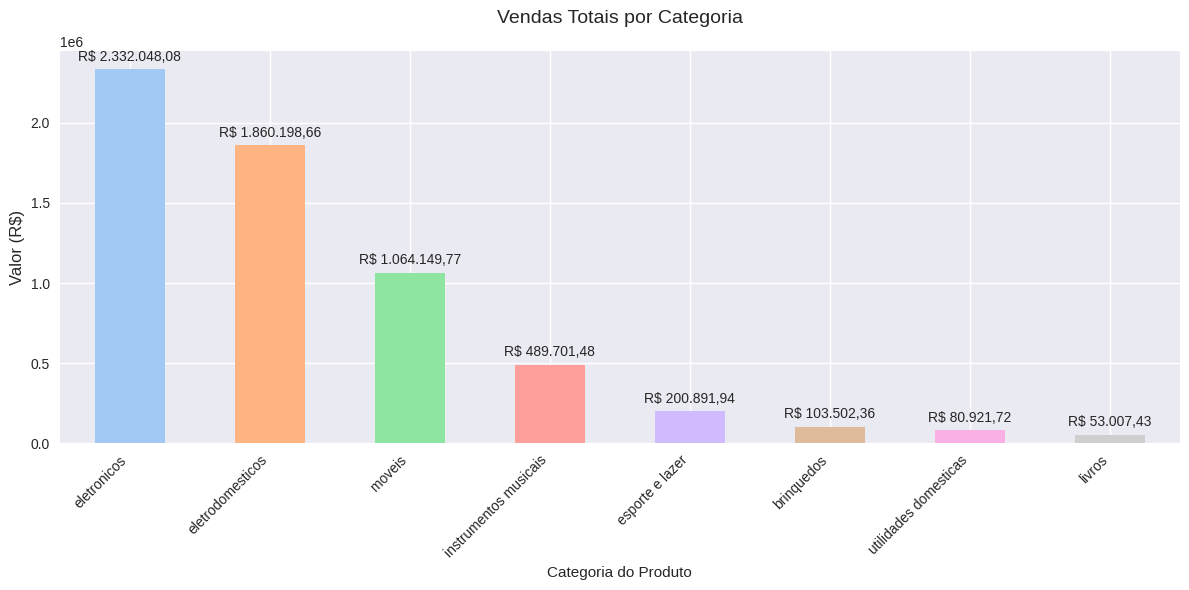

<Figure size 1400x700 with 0 Axes>

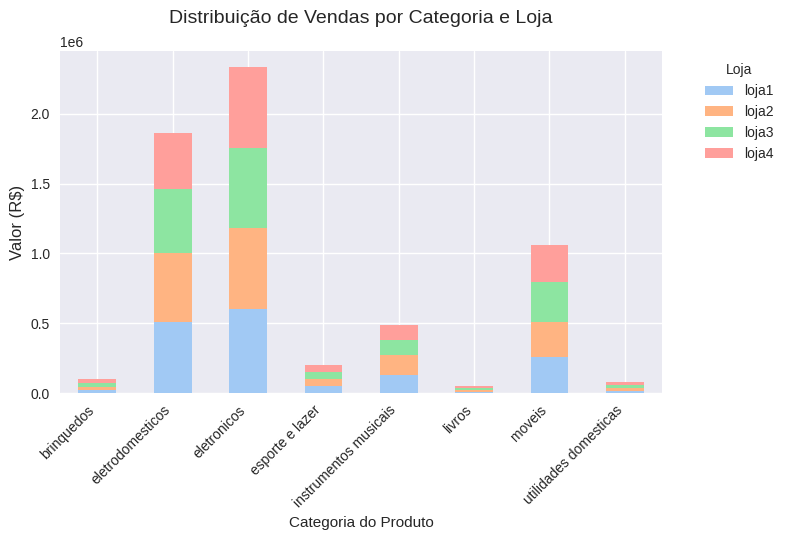

✅ Análise concluída com sucesso!


In [10]:

!pip install pandas matplotlib seaborn --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


urls = {
    "loja1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "loja2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "loja3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "loja4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}


try:
    dfs = []
    for nome, url in urls.items():
        df = pd.read_csv(url)
        df['Loja'] = nome
        df['Total_Venda'] = df['Preço'] + df['Frete']
        dfs.append(df)

    dados_completos = pd.concat(dfs)

    if 'Categoria do Produto' not in dados_completos.columns:
        raise Exception("Coluna 'Categoria do Produto' não encontrada")

except Exception as e:
    print(f"Erro ao carregar dados: {e}")
    print("Colunas disponíveis:", list(dados_completos.columns) if 'dados_completos' in locals() else "Dados não carregados")
else:

    print("\n🔍 Análise de Vendas por Categoria")

    def formatar_br(valor):
        return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

    vendas_por_categoria = dados_completos.groupby('Categoria do Produto')['Total_Venda'].sum().sort_values(ascending=False)
    vendas_categoria_loja = dados_completos.groupby(['Categoria do Produto', 'Loja'])['Total_Venda'].sum().unstack()

    print("\n📊 Vendas Totais por Categoria:")
    display(vendas_por_categoria.apply(formatar_br).to_frame(name="Total Vendido"))

    print("\n🏪 Vendas por Categoria e Loja:")
    display(vendas_categoria_loja.applymap(formatar_br))


    print("\n📈 Gráficos de Análise:")


    plt.style.use('seaborn-v0_8')


    plt.figure(figsize=(12, 6))
    ax = vendas_por_categoria.plot(kind='bar', color=sns.color_palette("pastel"))
    plt.title('Vendas Totais por Categoria', fontsize=14, pad=20)
    plt.ylabel('Valor (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(formatar_br(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(14, 7))
    vendas_categoria_loja.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
    plt.title('Distribuição de Vendas por Categoria e Loja', fontsize=14, pad=20)
    plt.ylabel('Valor (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    print("✅ Análise concluída com sucesso!")

In [11]:

import pandas as pd
import matplotlib.pyplot as plt


urls = {
    "loja1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "loja2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "loja3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "loja4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

s
try:
    dfs = []
    for nome, url in urls.items():
        df = pd.read_csv(url)
        df['Loja'] = nome
        df['Total_Venda'] = df['Preço'] + df['Frete']
        dfs.append(df)

    dados_completos = pd.concat(dfs)

    if 'Categoria do Produto' not in dados_completos.columns:
        raise Exception("Coluna 'Categoria do Produto' não encontrada")

except Exception as e:
    print(f"Erro ao carregar dados: {e}")
    print("Colunas disponíveis:", list(dados_completos.columns) if 'dados_completos' in locals() else "Dados não carregados")
else:

    print("\n🔍 Análise de Vendas por Categoria")

    def formatar_br(valor):
        return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

    vendas_por_categoria = dados_completos.groupby('Categoria do Produto')['Total_Venda'].sum().sort_values(ascending=False)
    vendas_categoria_loja = dados_completos.groupby(['Categoria do Produto', 'Loja'])['Total_Venda'].sum().unstack()


    print("\n📊 Vendas Totais por Categoria:")
    display(vendas_por_categoria.apply(formatar_br).to_frame(name="Total Vendido"))

    print("\n🏪 Vendas por Categoria e Loja:")
    display(vendas_categoria_loja.applymap(formatar_br))


    print("\n📈 Gráficos de Análise")


    plt.style.use('ggplot')

    # Paleta de cores manual (substituindo o Seaborn)
    cores = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

    # Gráfico 1: Vendas por categoria
    plt.figure(figsize=(12, 6))
    vendas_por_categoria.plot(kind='bar', color=cores)
    plt.title('Vendas Totais por Categoria', fontsize=14, pad=20)
    plt.ylabel('Valor (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')


    for i, valor in enumerate(vendas_por_categoria):
        plt.text(i, valor, formatar_br(valor),
                 ha='center', va='bottom',
                 fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(14, 7))
    vendas_categoria_loja.plot(kind='bar', stacked=True, color=cores)
    plt.title('Distribuição de Vendas por Categoria e Loja', fontsize=14, pad=20)
    plt.ylabel('Valor (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    print("✅ Análise concluída com sucesso!")

NameError: name 's' is not defined

# 3. Média de Avaliação das Lojas

In [ ]:
l = [7, 6, 3, 4]
l[0]

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

if 'Avaliação da compra' in dados_completos.columns:
    print("\n⭐ MÉDIA DE AVALIAÇÃO POR LOJA")
    print("----------------------------------------")


    avaliacao_loja = dados_completos.groupby('Loja')['Avaliação da compra'].agg(['mean', 'count'])
    avaliacao_loja.columns = ['Média', 'Total Avaliações']
    avaliacao_loja = avaliacao_loja.sort_values('Média', ascending=False)


    avaliacao_formatada = avaliacao_loja.copy()
    avaliacao_formatada['Média'] = avaliacao_formatada['Média'].apply(lambda x: f"{x:.2f} ★")


    display(avaliacao_formatada.style.set_caption("Desempenho das Lojas por Avaliação"))


    plt.figure(figsize=(10, 5))
    bars = plt.bar(
        x=avaliacao_loja.index,
        height=avaliacao_loja['Média'],
        color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'],
        alpha=0.8
    )


    plt.title('Média de Avaliação por Loja\n(0-5 estrelas)', fontweight='bold', pad=20)
    plt.xlabel('Lojas', fontsize=12)
    plt.ylabel('Média de Avaliação', fontsize=12)
    plt.ylim(0, 5.5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.text(
    bar.get_x() + bar.get_width()/2., height,
    f"{height:.2f} *\n({total} avaliações)",
    ha='center', va='center', fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

    plt.tight_layout()
    plt.show()

else:
    print("\n🔴 Coluna 'Avaliação da compra' não encontrada no dataset.")



# 4. Produtos Mais e Menos Vendidos

In [ ]:


def analisar_produtos(df, escopo="Todas as Lojas"):
    """
    Analisa produtos mais e menos vendidos para um DataFrame dado
    """
    print(f"\n📊 ANÁLISE DE PRODUTOS - {escopo.upper()}")
    print("="*50)


    colunas_disponiveis = df.columns.tolist()
    print(f"Colunas disponíveis: {colunas_disponiveis}")

a)
    if 'Quantidade' not in colunas_disponiveis:
        df['Quantidade'] = 1


    try:
        produtos = df.groupby('Produto').agg({
            'Total_Venda': 'sum',
            'Quantidade': 'sum',
            'Preço': 'mean'
        }).rename(columns={
            'Total_Venda': 'Faturamento Total',
            'Quantidade': 'Unidades Vendidas',
            'Preço': 'Preço Médio'
        }).sort_values('Faturamento Total', ascending=False)
    except KeyError as e:
        print(f"\n⚠️ Erro: {e}")
        print("Verifique os nomes das colunas no seu DataFrame")
        return


    def format_br(valor):
        return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")


    print("\n🌟 TOP 5 PRODUTOS MAIS VENDIDOS:")
    top5 = produtos.head(5).copy()
    top5['Faturamento Total'] = top5['Faturamento Total'].apply(format_br)
    top5['Preço Médio'] = top5['Preço Médio'].apply(format_br)
    display(top5)

    print("\n🔻 5 PRODUTOS MENOS VENDIDOS:")
    bottom5 = produtos.tail(5).copy()
    bottom5['Faturamento Total'] = bottom5['Faturamento Total'].apply(format_br)
    bottom5['Preço Médio'] = bottom5['Preço Médio'].apply(format_br)
    display(bottom5)


    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    produtos.head(5)['Faturamento Total'].plot(kind='bar', color='#2ecc71')
    plt.title(f'Top 5 Produtos - {escopo}', fontweight='bold')
    plt.ylabel('Faturamento Total (R$)')
    plt.xticks(rotation=45, ha='right')


    plt.subplot(1, 2, 2)
    produtos.tail(5)['Faturamento Total'].plot(kind='bar', color='#e74c3c')
    plt.title(f'5 Menos Vendidos - {escopo}', fontweight='bold')
    plt.ylabel('Faturamento Total (R$)')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


colunas_necessarias = ['Produto', 'Total_Venda', 'Preço']
colunas_faltantes = [col for col in colunas_necessarias if col not in dados_completos.columns]

if not colunas_faltantes:

    analisar_produtos(dados_completos)


    for loja in dados_completos['Loja'].unique():
        dados_loja = dados_completos[dados_completos['Loja'] == loja]
        analisar_produtos(dados_loja, escopo=f"Loja {loja[-1]}")
else:
    print(f"\n🔴 Erro: Colunas faltantes no DataFrame: {colunas_faltantes}")
    print("Colunas disponíveis:", dados_completos.columns.tolist())

# 5. Frete Médio por Loja


In [ ]:
def analisar_frete_por_loja(df):
    """
    Analisa estatísticas de frete por loja
    """
    print("\n🚚 ANÁLISE DE FRETE POR LOJA")
    print("="*50)

      if 'Frete' not in df.columns:
        print("🔴 Erro: Coluna 'Frete' não encontrada no DataFrame")
        print("Colunas disponíveis:", df.columns.tolist())
        return


    frete_por_loja = df.groupby('Loja')['Frete'].agg(['mean', 'median', 'std', 'count'])
    frete_por_loja.columns = ['Média', 'Mediana', 'Desvio Padrão', 'Total Vendas']


    def format_br(valor):
        return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

    frete_formatado = frete_por_loja.copy()
    for col in ['Média', 'Mediana', 'Desvio Padrão']:
        frete_formatado[col] = frete_formatado[col].apply(format_br)


    print("\n📊 ESTATÍSTICAS DE FRETE POR LOJA:")
    display(frete_formatado)


    plt.figure(figsize=(12, 6))


    ax = frete_por_loja['Média'].sort_values().plot(
        kind='bar',
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
        alpha=0.8
    )

    for p in ax.patches:
        ax.annotate(
            format_br(p.get_height()),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=10
        )


    plt.title('Frete Médio por Loja', fontsize=14, pad=20)
    plt.xlabel('Loja', fontsize=12)
    plt.ylabel('Valor do Frete (R$)', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    df.boxplot(column='Frete', by='Loja', grid=False, patch_artist=True)
    plt.title('Distribuição de Valores de Frete por Loja', fontsize=14, pad=20)
    plt.suptitle('')
    plt.xlabel('Loja', fontsize=12)
    plt.ylabel('Valor do Frete (R$)', fontsize=12)
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


analisar_frete_por_loja(dados_completos)

# 6. Dados Geográficos (lon e lat)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle

def analise_geografica_vendas(df):

    required_cols = ['lat', 'lon', 'Produto', 'Preço', 'Frete']
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        print(f"Colunas faltando: {missing}")
        return


    print("\n📍 MÉDIAS GEOGRÁFICAS:")
    geo_metrics = df.groupby(['lat', 'lon']).agg({
        'Preço': 'mean',
        'Frete': 'mean',
        'Produto': 'count'
    }).rename(columns={
        'Preço': 'Preço Médio',
        'Frete': 'Frete Médio',
        'Produto': 'Qtd Vendas'
    }).reset_index()

    display(geo_metrics.sort_values('Qtd Vendas', ascending=False).head(10))


    print("\n📊 CORRELAÇÃO ENTRE DISTÂNCIA E FRETE:")

 )
    centro_lat, centro_lon = df['lat'].mean(), df['lon'].mean()


    df['distancia_centro'] = df.apply(
        lambda row: great_circle((centro_lat, centro_lon), (row['lat'], row['lon'])).km,
        axis=1
    )


    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='distancia_centro', y='Frete', hue='Preço', palette='viridis')
    plt.title('Relação entre Distância do Centro e Valor do Frete')
    plt.xlabel('Distância do Centro Geográfico (km)')
    plt.ylabel('Valor do Frete (R$)')
    plt.legend(title='Preço do Produto')
    plt.grid(True)
    plt.show()


    print("\n🌎 MAPA DE CALOR DE VENDAS:")
    plt.figure(figsize=(12, 8))

   e
    scatter = plt.scatter(
        x=df['lon'],
        y=df['lat'],
        s=df['Preço']*2,
        c=df['Frete'],
        alpha=0.6,
        cmap='coolwarm'
    )

    plt.colorbar(scatter, label='Valor do Frete (R$)')
    plt.title('Distribuição Geográfica de Vendas\n(Tamanho: Preço | Cor: Frete)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()


    print("\n🗺️ TOP PRODUTOS POR REGIÃO:")
    df['regiao'] = pd.cut(df['lat'], bins=3, labels=['Sul', 'Centro', 'Norte'])

    top_produtos_regiao = df.groupby(['regiao', 'Produto']).agg({
        'Preço': 'mean',
        'Frete': 'mean',
        'lon': 'count'
    }).rename(columns={'lon': 'Qtd Vendas'}).sort_values(['regiao', 'Qtd Vendas'], ascending=[True, False])

    display(top_produtos_regiao.groupby('regiao').head(3))


analise_geografica_vendas(dados_completos)

1. Agrupamento Automático:


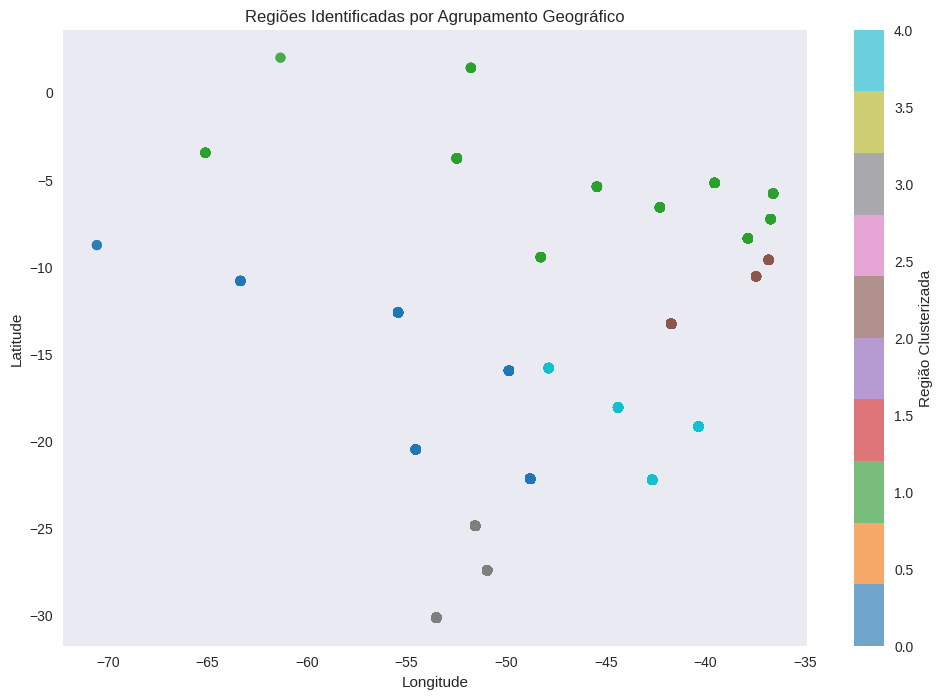


📊 ESTATÍSTICAS POR REGIÃO CLUSTERIZADA:


,Preço Médio,Frete Médio,Total Vendas
regiao_cluster,,,
0,619.392606,33.033045,4313
1,613.142353,32.678964,663
2,575.728496,30.598793,379
3,642.845994,34.154145,1353
4,625.436513,33.364681,2727



2. Divisão Cardeal:


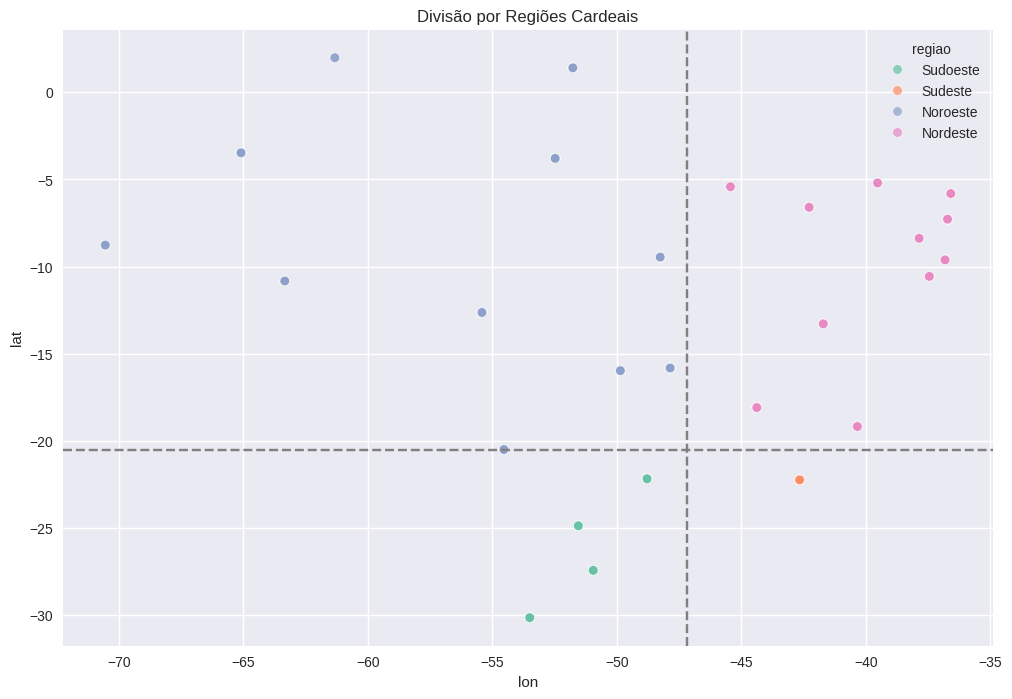


🛒 PRODUTOS MAIS VENDIDOS POR REGIÃO:


Produto,Assistente virtual,Bateria,Bicicleta,Blocos de montar,Bola de basquete,Bola de vôlei,Boneca bebê,Cadeira de escritório,Cama box,Cama king,Carrinho controle remoto,Celular ABXY,Celular Plus X42,Ciência de dados com python,Copo térmico,Corda de pular,Cubo mágico 8x8,Cômoda,Dashboards com Power BI,Dinossauro Rex,Faqueiro,Fogão,Fone de ouvido,Geladeira,Guarda roupas,Guitarra,Headset,Impressora,Iniciando em programação,Jogo de copos,Jogo de panelas,Jogo de tabuleiro,Kit banquetas,Lava louças,Lavadora de roupas,Mesa de centro,Mesa de jantar,Micro-ondas,Mochila,Modelagem preditiva,Pandeiro,Panela de pressão,Poltrona,Secadora de roupas,Smart TV,Smartwatch,Sofá retrátil,TV Led UHD 4K,Tablet ABXY,Violão,Xadrez de madeira
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nordeste,42,49,53,43,43,46,52,39,52,40,41,30,42,36,32,43,39,52,41,40,43,46,39,40,50,44,34,47,52,42,46,41,40,38,32,45,47,47,34,50,36,45,43,37,36,43,46,53,47,43,39
Noroeste,14,13,18,18,19,11,17,22,17,19,17,10,23,22,16,11,16,13,13,13,20,17,11,11,10,14,15,8,11,10,15,18,13,15,13,19,14,19,11,10,15,14,13,19,15,13,8,14,13,16,11
Sudeste,17,27,16,24,12,19,20,22,28,33,20,23,29,27,18,23,27,20,22,24,16,19,31,32,31,20,23,25,18,25,32,21,29,22,28,23,16,18,35,30,38,24,20,21,29,20,24,18,23,26,24
Sudoeste,94,114,109,114,123,108,86,98,102,109,128,94,104,81,121,109,98,125,105,98,110,105,93,108,106,87,86,108,114,92,107,95,106,114,103,88,108,122,83,110,108,89,92,123,112,96,104,102,96,103,106


In [12]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def identificar_regioes(df):

    if not all(col in df.columns for col in ['lat', 'lon']):
        print("Colunas 'lat' ou 'lon' não encontradas")
        return


    coords = df[['lat', 'lon']].values
    kmeans = KMeans(n_clusters=5, random_state=42)
    df['regiao_cluster'] = kmeans.fit_predict(coords)


    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        x=df['lon'],
        y=df['lat'],
        c=df['regiao_cluster'],
        cmap='tab10',
        alpha=0.6
    )
    plt.colorbar(scatter, label='Região Clusterizada')
    plt.title('Regiões Identificadas por Agrupamento Geográfico')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()


    print("\n📊 ESTATÍSTICAS POR REGIÃO CLUSTERIZADA:")
    regioes_stats = df.groupby('regiao_cluster').agg({
        'Preço': 'mean',
        'Frete': 'mean',
        'Produto': 'count'
    }).rename(columns={
        'Preço': 'Preço Médio',
        'Frete': 'Frete Médio',
        'Produto': 'Total Vendas'
    })
    display(regioes_stats)


def regioes_cardeais(df):
    if not all(col in df.columns for col in ['lat', 'lon']):
        return


    centro_lat, centro_lon = df['lat'].mean(), df['lon'].mean()


    df['regiao'] = 'Centro'
    df.loc[df['lat'] > centro_lat, 'regiao'] = 'Norte'
    df.loc[df['lat'] < centro_lat, 'regiao'] = 'Sul'
    df.loc[df['lon'] > centro_lon, 'regiao'] += 'Leste'
    df.loc[df['lon'] < centro_lon, 'regiao'] += 'Oeste'


    df['regiao'] = df['regiao'].replace({
        'NorteLeste': 'Nordeste',
        'NorteOeste': 'Noroeste',
        'SulLeste': 'Sudeste',
        'SulOeste': 'Sudoeste'
    })


    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x='lon',
        y='lat',
        hue='regiao',
        palette='Set2',
        alpha=0.7
    )
    plt.title('Divisão por Regiões Cardeais')
    plt.axhline(y=centro_lat, color='gray', linestyle='--')
    plt.axvline(x=centro_lon, color='gray', linestyle='--')
    plt.show()

    return df


print("1. Agrupamento Automático:")
identificar_regioes(dados_completos.copy())

print("\n2. Divisão Cardeal:")
dados_completos = regioes_cardeais(dados_completos.copy())

if 'regiao' in dados_completos.columns:
    print("\n🛒 PRODUTOS MAIS VENDIDOS POR REGIÃO:")
    top_produtos = dados_completos.groupby(['regiao', 'Produto']).size().unstack().fillna(0)
    display(top_produtos.style.background_gradient(cmap='Blues'))

#7. Relatório


# Análise Estratégica para Avaliação de Venda de Lojas

Foram disponibilizados os dados de vendas das quatro lojas da rede do Sr. João, contendo as seguintes informações:

Dados de transações: Produto, Categoria, Preço, Frete, Data da Compra

Informações operacionais: Vendedor, Local da compra, Avaliação do cliente

Dados financeiros: Tipo de pagamento, Quantidade de parcelas

Dados geográficos: Latitude e Longitude

Limitações da Análise Atual:
Embora os dados disponíveis permitam análises importantes de desempenho por:

Faturamento bruto por loja

Volume de vendas e ticket médio

Custos com frete

Satisfação dos clientes

Métodos de pagamento

Distribuição geográfica das vendas

Recomendações para Análise Completa:

Dados Necessários Adicionais:

Custo de aquisição por produto (para cálculo de margem de lucro)

Despesas operacionais por loja (aluguel, salários, utilities)

Investimentos recentes em cada unidade

Dados históricos de desempenho

Análise da Loja 4 (Menor Faturamento):

Embora apresente o menor faturamento, recomendamos cautela na interpretação:
Variáveis a considerar:

Localização e potencial de crescimento

Sazonalidade das vendas

Eficiência operacional comparativa

Custo-benefício da unidade

Próximos Passos:

Solicitar os dados de custos para análise de lucratividade real

Realizar avaliação do imóvel e contrato de aluguel

Analisar o potencial de revitalização versus venda

Considerar sinergias com outras unidades da rede

Conclusão:
A decisão sobre a venda de qualquer unidade deve ser baseada em uma análise multidimensional. Com os dados atuais, podemos identificar indicadores de desempenho, mas não determinar a viabilidade financeira da operação. Recomendamos complementar esta análise com os dados de custos solicitados para uma avaliação estratégica completa.